<a href="https://colab.research.google.com/github/huaijiangzhu/SummerML/blob/master/day6/demo_pytorch_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'axes.labelcolor':'white', 'ytick.color':'white'});

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [3]:
## Pytorch tensors are very similear to numpy arrays
X = torch.Tensor([[1, 2, 3], [4, 5, 6]])
print (X, '\n')

## You can convert it into a numpy array
Xnp = X.cpu().detach().numpy()
print (type(Xnp),'\n', Xnp, '\n')

## You can also convert a numpy array to a pytorch tensor
X = torch.Tensor(Xnp)
print (type(X),'\n', X, '\n')


tensor([[1., 2., 3.],
        [4., 5., 6.]]) 

<class 'numpy.ndarray'> 
 [[1. 2. 3.]
 [4. 5. 6.]] 

<class 'torch.Tensor'> 
 tensor([[1., 2., 3.],
        [4., 5., 6.]]) 



In [4]:
## .cpu() is required when the tensor is stored on a GPU
## .detach() is required when the tensor is tracking gradient information
## The folloing code will NOT work without .detach().
tensor1 = torch.tensor([1.0,2.0], requires_grad=True)
tensor1 = tensor1.numpy()

RuntimeError: ignored

In [5]:
## requires_grad is by default set to False unless the tensor is a model parameter
print (X.requires_grad)

False


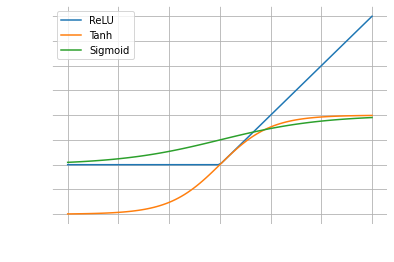

In [6]:
## the torch.nn module implements many useful functions
sigmoid = nn.Sigmoid()
relu = nn.ReLU()
tanh = nn.Tanh()

X = torch.linspace(-3, 3, 100)

plt.plot(X.numpy(), relu(X).numpy(), label='ReLU');
plt.plot(X.numpy(), tanh(X).numpy(), label='Tanh');
plt.plot(X.numpy(), sigmoid(X).numpy(), label='Sigmoid');
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left');

In [7]:
## the torch.nn module implements many useful functions: layers
n_samples = 5
n_in = 2
n_out = 3
fully_connected_layer = nn.Linear(n_in, n_out)

## the weights and bias of this layer is randomly initilized
## also notice that the requires_grad flag is set to True by default
print (fully_connected_layer.weight, '\n', fully_connected_layer.bias)
print ('\n')

## The layer takes in the inputs arranged in rows and gives the outputs likewise
X = torch.Tensor(n_samples, n_in) # generate some random inputs
print (X.shape, '\n', X, '\n')

y = fully_connected_layer(X)
print (y.shape, '\n', y, '\n')

## We can also compose pytorch functions
softmax = nn.Softmax(dim=1)
y = softmax(fully_connected_layer(X))
print (y.shape, '\n', y, '\n')


Parameter containing:
tensor([[ 0.4324, -0.5680],
        [-0.1732, -0.2293],
        [ 0.4002,  0.1010]], requires_grad=True) 
 Parameter containing:
tensor([-0.5153, -0.2955,  0.2629], requires_grad=True)


torch.Size([5, 2]) 
 tensor([[3.1589e-36, 0.0000e+00],
        [1.7316e-01, 2.2928e-01],
        [4.0025e-01, 1.0103e-01],
        [4.4721e+21, 2.8799e+32],
        [1.3816e+31, 1.9203e+31]]) 

torch.Size([5, 3]) 
 tensor([[-5.1532e-01, -2.9551e-01,  2.6292e-01],
        [-5.7068e-01, -3.7807e-01,  3.5539e-01],
        [-3.9965e-01, -3.8798e-01,  4.3333e-01],
        [-1.6358e+32, -6.6029e+31,  2.9095e+31],
        [-4.9338e+30, -6.7952e+30,  7.4699e+30]], grad_fn=<AddmmBackward>) 

torch.Size([5, 3]) 
 tensor([[0.2261, 0.2816, 0.4923],
        [0.2111, 0.2559, 0.5329],
        [0.2319, 0.2346, 0.5334],
        [0.0000, 0.0000, 1.0000],
        [0.0000, 0.0000, 1.0000]], grad_fn=<SoftmaxBackward>) 



In [8]:
## nn.Module provides a template for a neural network architecture
class MyNeuralNet(nn.Module):
    def __init__(self, n_in, n_out):
        # invoke __init__() from the parent class
        super().__init__()

        # construct layers and activation function
        self.fc1 = nn.Linear(n_in, 100)
        self.fc2 = nn.Linear(100, 200)
        self.fc3 = nn.Linear(200, n_out)
        self.sigmoid = nn.Sigmoid()
 
    
    def forward(self, inputs):

        # two hidden layers with sigmoid activation
        outputs = self.sigmoid(self.fc1(inputs))
        outputs = self.sigmoid(self.fc2(outputs))
        # the output layer is a fully connected layer without special activation
        outputs = self.fc3(outputs)

        return outputs

model = MyNeuralNet(n_in, n_out)
y = model(X)
print (y.shape)

torch.Size([5, 3])


## Pause for SGD lecture

In [9]:
## How do we randomly select a mini-batch from the dataset? Use pytorch dataloader!
## Let's show this on a randomly generated dataset.
from torch.utils.data import DataLoader

n_feature = 1
n_label = 1
N = 1000
N_train = 800
N_val = 200
X = 10 * (torch.rand(N, n_feature) - 0.5)
y = X * torch.cos(X) + torch.sin(X) ** 2 + 0.5*torch.rand(N, n_label)

data = torch.cat((X, y), dim=1)
data_train = data[:N_train, :]
data_val = data[N_train:, :]
dataloader = DataLoader(data_train, batch_size=50, shuffle=True)

for _, sample in enumerate(dataloader):
    print (sample.shape)
    x = sample[:, :n_feature]
    y = sample[:, n_feature:]
    print (x.shape, y.shape)
    print ('\n')

torch.Size([50, 2])
torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 2])
torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 2])
torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 2])
torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 2])
torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 2])
torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 2])
torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 2])
torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 2])
torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 2])
torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 2])
torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 2])
torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 2])
torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 2])
torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 2])
torch.Size([50, 1]) torch.Size([50, 1])


torch.Size([50, 2])
torch.Size([50, 1]) torch.Size([50, 1])




In [10]:
## That looks good. But how do we train NNs with SGD exactly?

# We need a model, a loss function and an optimizer!
model = MyNeuralNet(n_feature, n_label)
loss = nn.MSELoss(reduction='mean')
learning_rate = 1e-2
opt = optim.SGD(model.parameters(), lr=learning_rate)

# How many times should we go over the whole dataset?
epochs = 10000

# an empty list to collect the training loss
J_train_all = []

for i in range(epochs):
    for _, sample in enumerate(dataloader):
        # set model to training mode
        model.train()
        # clear gradients information from the previous iteration
        opt.zero_grad()
        # read out features and labels from the mini-batch
        x = sample[:, :n_feature]
        y = sample[:, n_feature:]
        # predict the labels using the model
        y_hat = model(x)
        # compute the loss 
        J = loss(y_hat, y)
        # compute the gradients
        J.backward()
        # update the parameters using the optimizer
        opt.step()

    # You might want to check the training loss from time to time...
    if i % 100 == 0:
        # set the model to evaluation mode
        model.eval()
        # we don't really need to compute the gradients here
        # so temporally turn it off to accelerate the computation
        with torch.no_grad():
            J_train = loss(model(data_train[:, :n_feature]), data_train[:, n_feature:])
            J_train_all.append(J_train)
            print (J_train.numpy()) 
            # print() is ugly and slows down the code.
            # Pro tips: Google the tqdm library and learn how to show a nicer training progress bar!  



2.8123121
1.492702
1.5442265
1.4835545
1.4799945
1.4792931
1.4745979
1.4526007
1.4433972
1.4417465
1.4225556
1.3632237
1.2530544
0.89023757
0.8504033
0.7642511
0.35395977
0.2600141
0.16271095
0.1254012
0.16197763
0.09123699
0.1416675
0.20069057
0.12287426
0.08378901
0.082128026
0.069829255
0.049982276
0.16106696
0.057325993
0.14490828
0.0459833
0.041087113
0.041683603
0.10845075
0.04189086
0.04592088
0.093445055
0.062908515
0.039363183
0.03344591
0.06555903
0.033808783
0.031944178
0.033646256
0.047821797
0.06841887
0.037241668
0.038829766
0.033185497
0.034259297
0.0380864
0.03335887
0.029583614
0.030692969
0.053266283
0.032045122
0.035611343
0.041704506
0.03389725
0.032340813
0.030141125
0.027010566
0.040060468
0.026353365
0.027741447
0.032658692
0.026443033
0.02718072
0.02860906
0.041096125
0.03392261
0.06924297
0.030355072
0.024868011
0.027009564
0.028375909
0.042536765
0.053223774
0.03613108
0.03630582
0.024174917
0.027499786
0.027266705
0.02905526
0.036652397
0.024552284
0.03299281

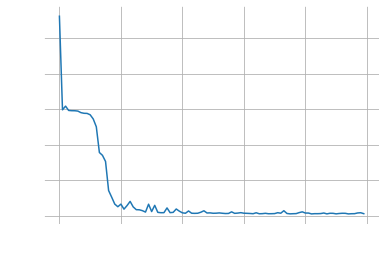

In [11]:
## Plot the loss curve

plt.plot(np.arange(0, epochs,100), J_train_all)
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Training loss');

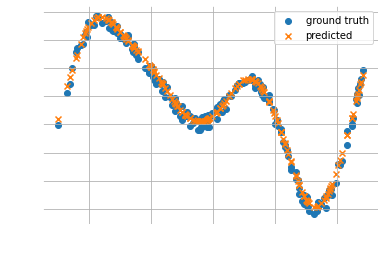

In [12]:
## Let's test our trained model
X_val = data_val[:, :n_feature]
y_val = data_val[:, n_feature:]

model.eval()
with torch.no_grad():
    y_hat = model(X_val)

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_val.numpy(), y_val.numpy(), marker='o', label='ground truth')
plt.scatter(X_val.numpy(), y_hat.numpy(), marker='x', label='predicted')
plt.grid()
plt.legend();